In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [3]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
numpy: 1.14.0
pandas: 0.22.0
matplotlib: 2.1.2
seaborn: 0.8.1
sklearn: 0.19.1


In [4]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

# Getting started!

First thing first, we need to import the dataset and have a peak at it....

In [5]:
# importing the dataset to a variable
data = pd.read_csv("K:/CIC-2017-dataset/CIC-IDS-2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")

# displaying first 3 observations
data.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


We can see that the data has been imported successfully.
Now we need to know the number of observations and features we have.

In [6]:
# dimensions of the data
# where x will be no. of observation
# and y will be features including 1 target variable
x, y = data.shape   # x=445909   y=79

print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of traffic.')  # removing count of a target variable in 'y'

We have  445909  number of observations and  78  features for this dataset to predict type of forest cover.


Let's look at the datatypes of each feature and see if it needs any processing if the feature is not in its appropriate form

In [ ]:
[' Destination Port', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' Flow IAT Min',
' Fwd IAT Min', ' Bwd IAT Min', ' Average Packet Size', ' Bwd Packet Length Std',
' Fwd Packet Length Std', ' Packet Length Std', ' Total Backward Packets', ' Total Length of Bwd Packets',
' Min_seg_size_forward', ' Label']

In [11]:
# datatypes of features
data.dtypes

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                     object
 Flow Packets/s                  object
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


# Explanation & Exploration of the data

Our dataset has 78 features and 1 target variable ' Label'. From 78 features, 60 are numeric and 18 are catrgorical. From 18 categorical, 10 are the features that always contain only one value 0.
So we can delete that kind of redundant catrgorical columns whose values are always zero.

# Feature statistics --- feature describe

We will split the data in 2 parts. First part will contain all numerical features and second part will contain all binary or categorical features of the data. The target variable Cover_Type is excluded.

In [18]:
# Extracting all numerical features from data
num_fea = data[[" Destination Port",
           " Flow Duration",
           " Total Fwd Packets",
           " Total Backward Packets",
           "Total Length of Fwd Packets",
           " Total Length of Bwd Packets",
           " Down/Up Ratio",
           " Fwd Packet Length Max",
           " Fwd Packet Length Min",
           " Fwd Packet Length Mean",
           " Fwd Packet Length Std",
           "Bwd Packet Length Max",
           " Bwd Packet Length Min",
           " Bwd Packet Length Mean",
           " Bwd Packet Length Std",
           "Flow Bytes/s",
           " Flow Packets/s",
           " Flow IAT Mean",
           " Flow IAT Std",
           " Flow IAT Max",
           " Flow IAT Min", 
           "Fwd IAT Total",
           " Fwd IAT Mean",
           " Fwd IAT Std",
           " Fwd IAT Max", 
           " Fwd IAT Min",
           "Bwd IAT Total", 
           " Bwd IAT Mean",
           " Bwd IAT Std", 
           " Bwd IAT Max", 
           " Bwd IAT Min", 
           " Fwd Header Length",
           " Bwd Header Length",
           "Fwd Packets/s",
           " Bwd Packets/s", 
           " Min Packet Length",
           " Max Packet Length",
           " Packet Length Mean",
           " Packet Length Std",
           " Packet Length Variance",
           " Avg Bwd Segment Size",
           " Average Packet Size",
           " Avg Fwd Segment Size",
           " Fwd Header Length",
           "Subflow Fwd Packets", 
           " Subflow Fwd Bytes", 
           " Subflow Bwd Packets",
           " Subflow Bwd Bytes",
           "Init_Win_bytes_forward", 
           " Init_Win_bytes_backward", 
           " act_data_pkt_fwd",
           " min_seg_size_forward",
           "Active Mean",
           " Active Std",
           " Active Max",
           " Active Min",
           "Idle Mean",
           " Idle Std",
           " Idle Max",
           " Idle Min"

 ]]

# extracting all binary/ categorical features from data
binary_fea = data[["Fwd PSH Flags",
           " Bwd PSH Flags",  # 0
           " Fwd URG Flags",  # 0
           " Bwd URG Flags",  # 0
           "FIN Flag Count", 
           " SYN Flag Count",
           " RST Flag Count",
           " PSH Flag Count",
           " ACK Flag Count",
           " URG Flag Count",
           " CWE Flag Count",  # 0
           " ECE Flag Count",
           "Fwd Avg Bytes/Bulk",  # 0
           " Fwd Avg Packets/Bulk", # 0
           " Fwd Avg Bulk Rate",  # 0
           " Bwd Avg Bytes/Bulk",  # 0
           " Bwd Avg Packets/Bulk", # 0
           "Bwd Avg Bulk Rate"]]


In [19]:
binary_fea.shape

(445909, 18)

In [20]:
binary_fea.describe()

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,445909.000000,445909.0,445909.0,445909.0,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000,445909.0,445909.000000,445909.0,445909.0,445909.0,445909.0,445909.0,445909.0
mean,0.060723,0.0,0.0,0.0,0.018380,0.060723,0.000336,0.242597,0.291687,0.115091,0.0,0.000339,0.0,0.0,0.0,0.0,0.0,0.0
std,0.238822,0.0,0.0,0.0,0.134323,0.238822,0.018338,0.428654,0.454540,0.319132,0.0,0.018399,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
binary_fea = binary_fea.drop([" Bwd PSH Flags",  # 0
           " Fwd URG Flags",  # 0
           " Bwd URG Flags",
           " CWE Flag Count",
           "Fwd Avg Bytes/Bulk",  # 0
           " Fwd Avg Packets/Bulk", # 0
           " Fwd Avg Bulk Rate",  # 0
           " Bwd Avg Bytes/Bulk",  # 0
           " Bwd Avg Packets/Bulk", # 0
           "Bwd Avg Bulk Rate"], axis=1)

In [22]:
binary_fea.describe()

,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count
count,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000,445909.000000
mean,0.060723,0.018380,0.060723,0.000336,0.242597,0.291687,0.115091,0.000339
std,0.238822,0.134323,0.238822,0.018338,0.428654,0.454540,0.319132,0.018399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
num_fea.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Down/Up Ratio,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,445909.000000,4.459090e+05,445909.000000,445909.000000,4.459090e+05,4.459090e+05,445909.00000,445909.000000,445909.000000,445909.000000,...,445909.000000,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05
mean,8878.375745,1.077944e+07,11.800473,13.907212,5.302105e+02,2.186324e+04,0.68745,173.346669,20.579979,48.528489,...,2.088341,-1.321786e+04,7.265964e+04,4.670517e+04,1.642092e+05,4.828426e+04,3.294459e+06,1.497105e+05,3.407025e+06,3.145407e+06
std,19522.889728,2.955629e+07,867.072428,1172.161547,5.676904e+03,2.625768e+06,0.53444,472.450792,38.938350,113.195021,...,6.325197,2.666478e+06,6.205625e+05,3.601504e+05,1.049887e+06,5.649489e+05,1.258776e+07,1.982346e+06,1.293249e+07,1.240892e+07
min,0.000000,-4.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.860000e+02,2.000000,1.000000,4.000000e+00,0.000000e+00,0.00000,1.000000,0.000000,0.857143,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.128800e+04,2.000000,2.000000,6.800000e+01,1.360000e+02,1.00000,41.000000,0.000000,37.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.668200e+05,4.000000,2.000000,1.500000e+02,3.360000e+02,1.00000,62.000000,41.000000,50.000000,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65505.000000,1.200000e+08,206446.000000,276072.000000,2.428415e+06,6.270000e+08,35.00000,24820.000000,2065.000000,4672.000000,...,1846.000000,1.380000e+02,1.070000e+08,2.410000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


# Feature Skew

Exploring Skewness of each features:

In [24]:
# skew distribution
data.skew()

 Destination Port                 1.882213
 Flow Duration                    2.883252
 Total Fwd Packets              187.174787
 Total Backward Packets         186.445394
Total Length of Fwd Packets     212.797897
 Total Length of Bwd Packets    189.322395
 Fwd Packet Length Max           11.967434
 Fwd Packet Length Min           22.449272
 Fwd Packet Length Mean          12.421745
 Fwd Packet Length Std            7.267489
Bwd Packet Length Max             3.011906
 Bwd Packet Length Min            4.799550
 Bwd Packet Length Mean           3.356727
 Bwd Packet Length Std            2.423119
Flow Bytes/s                           NaN
 Flow Packets/s                        NaN
 Flow IAT Mean                    9.618882
 Flow IAT Std                     7.060611
 Flow IAT Max                     5.002253
 Flow IAT Min                    21.824432
Fwd IAT Total                     2.921346
 Fwd IAT Mean                     8.069165
 Fwd IAT Std                      7.904365
 Fwd IAT Ma

# Class Distribution

Let's take a look how each class is distributed..

In [25]:
# grouping by forest cover type and calculating total occurance
data.groupby(' Label').size()

 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
dtype: int64

We have uneven samples of traffic type, where Benign traffic has the highest no. of observation followed by FTP-Patator. Intrusive traffics count only a small part of all traffic samples.

# Feature Visualization

Feature Spread - Visualizing the spread and outliers of the data of numerical features.

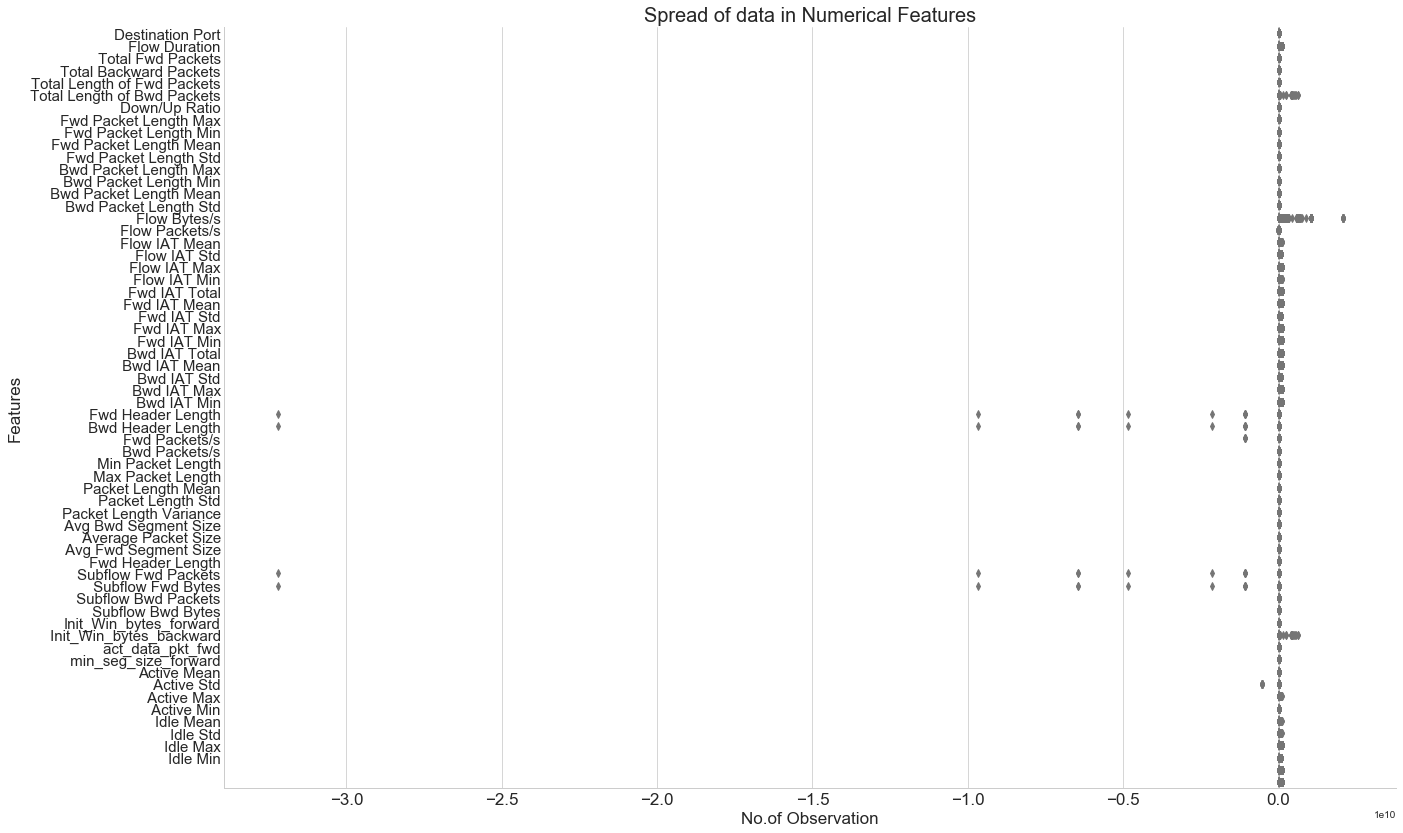

In [26]:
#####    1    ######
# Box and whiskers plot
# Spread of numerical features

# importing pyplot module from matplotlib to plt
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

# Feature Distribution

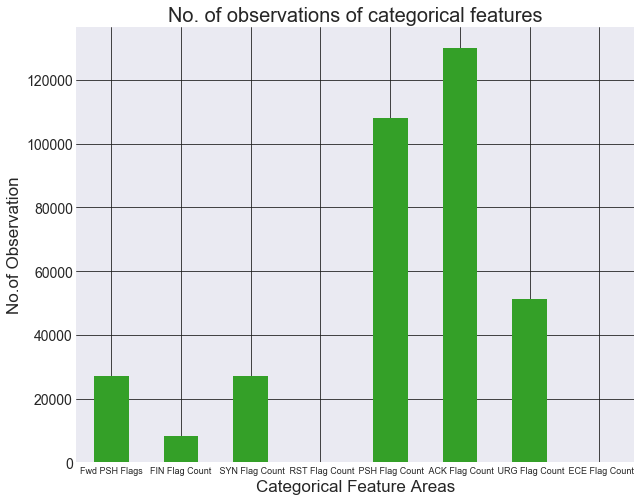

In [29]:
####    1    #####
# Bar plot
# Wilderness Area Count

# Splitting binary_fea data in 2
# Wild_data will have wilderness data
# Soil_Data will have Soil data



# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# list of colors
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
# using seaborn, passing color to palette
color = sns.color_palette(flatui)

# Sum the data, plot bar with given size using color defined
binary_fea.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

# Title of the graph
plt.title('No. of observations of categorical features', size = 20)

# Horizontal axis Label
plt.xlabel('Categorical Feature Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 9)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

And here's the visual proof, 'ACK Flag Count' has the most presence followed by 'PSH Flag Count', both have quite close observations and so were their mean value. 'RST Flag Count' and 'EC Flag Count' having the least observation. Lets see their exact values for precision.

In [31]:
# total count of each Wilderness Area
binary_fea.sum()

Fwd PSH Flags       27077
FIN Flag Count       8196
 SYN Flag Count     27077
 RST Flag Count       150
 PSH Flag Count    108176
 ACK Flag Count    130066
 URG Flag Count     51320
 ECE Flag Count       151
dtype: int64

Let's see the exact number of observations of binary feature Types (binary_fea) in descending order.

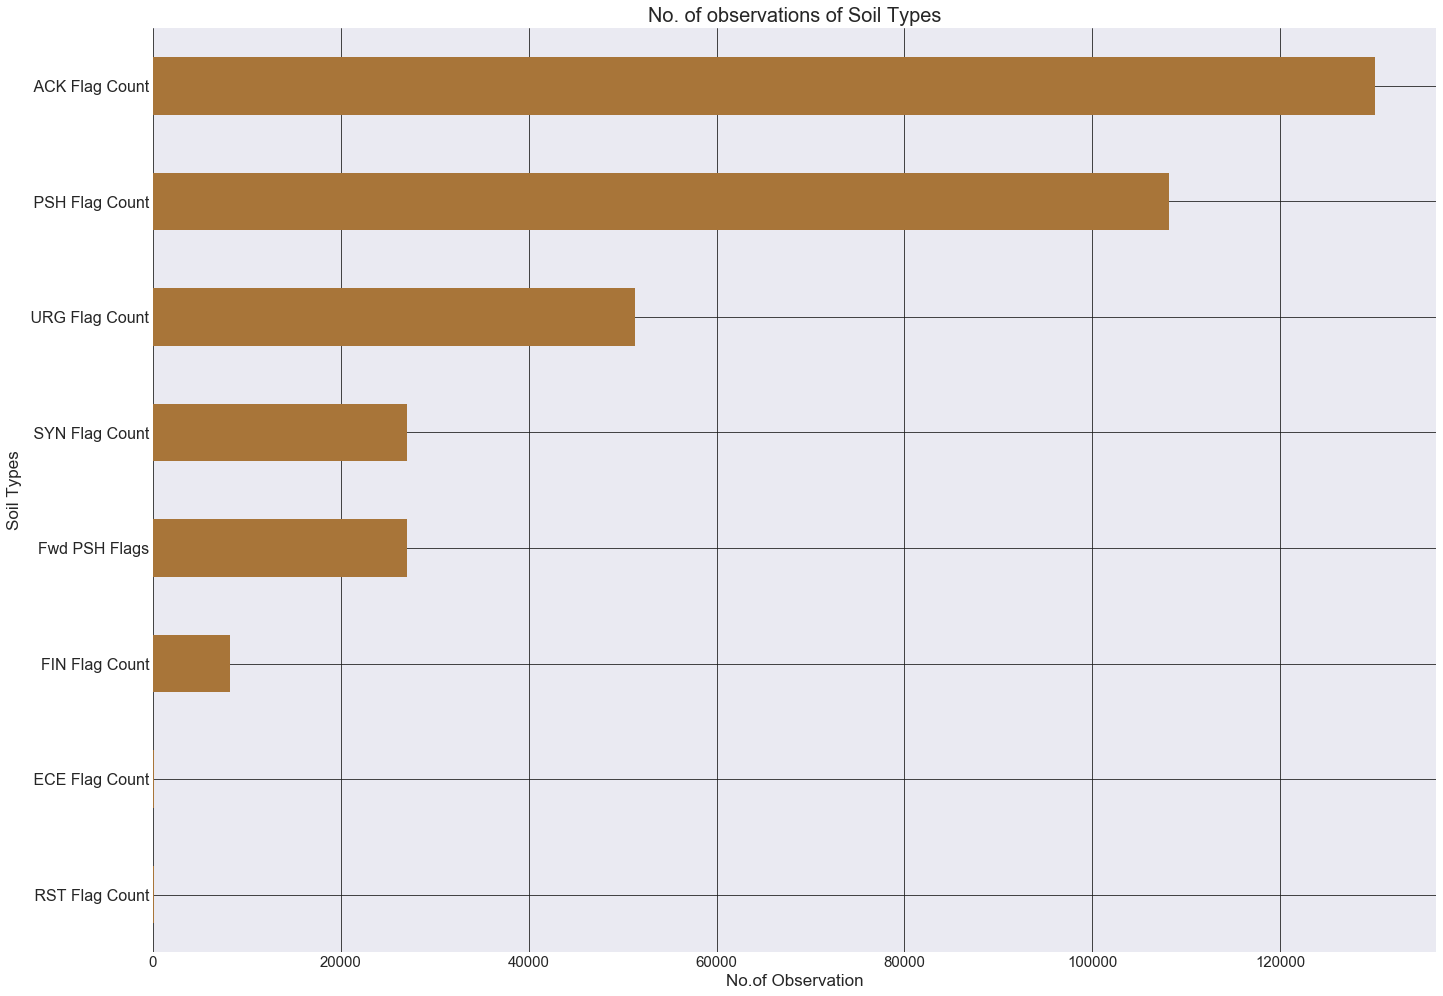

In [32]:
####    3.2    #####
# Horizontal Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(binary_fea.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of categorical Feature Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)

# Vertical axis Label
plt.ylabel('Feature Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [33]:
# Exact counts of observations of Soil Type
soil_sum

 ACK Flag Count    130066
 PSH Flag Count    108176
 URG Flag Count     51320
 SYN Flag Count     27077
Fwd PSH Flags       27077
FIN Flag Count       8196
 ECE Flag Count       151
 RST Flag Count       150
dtype: int64

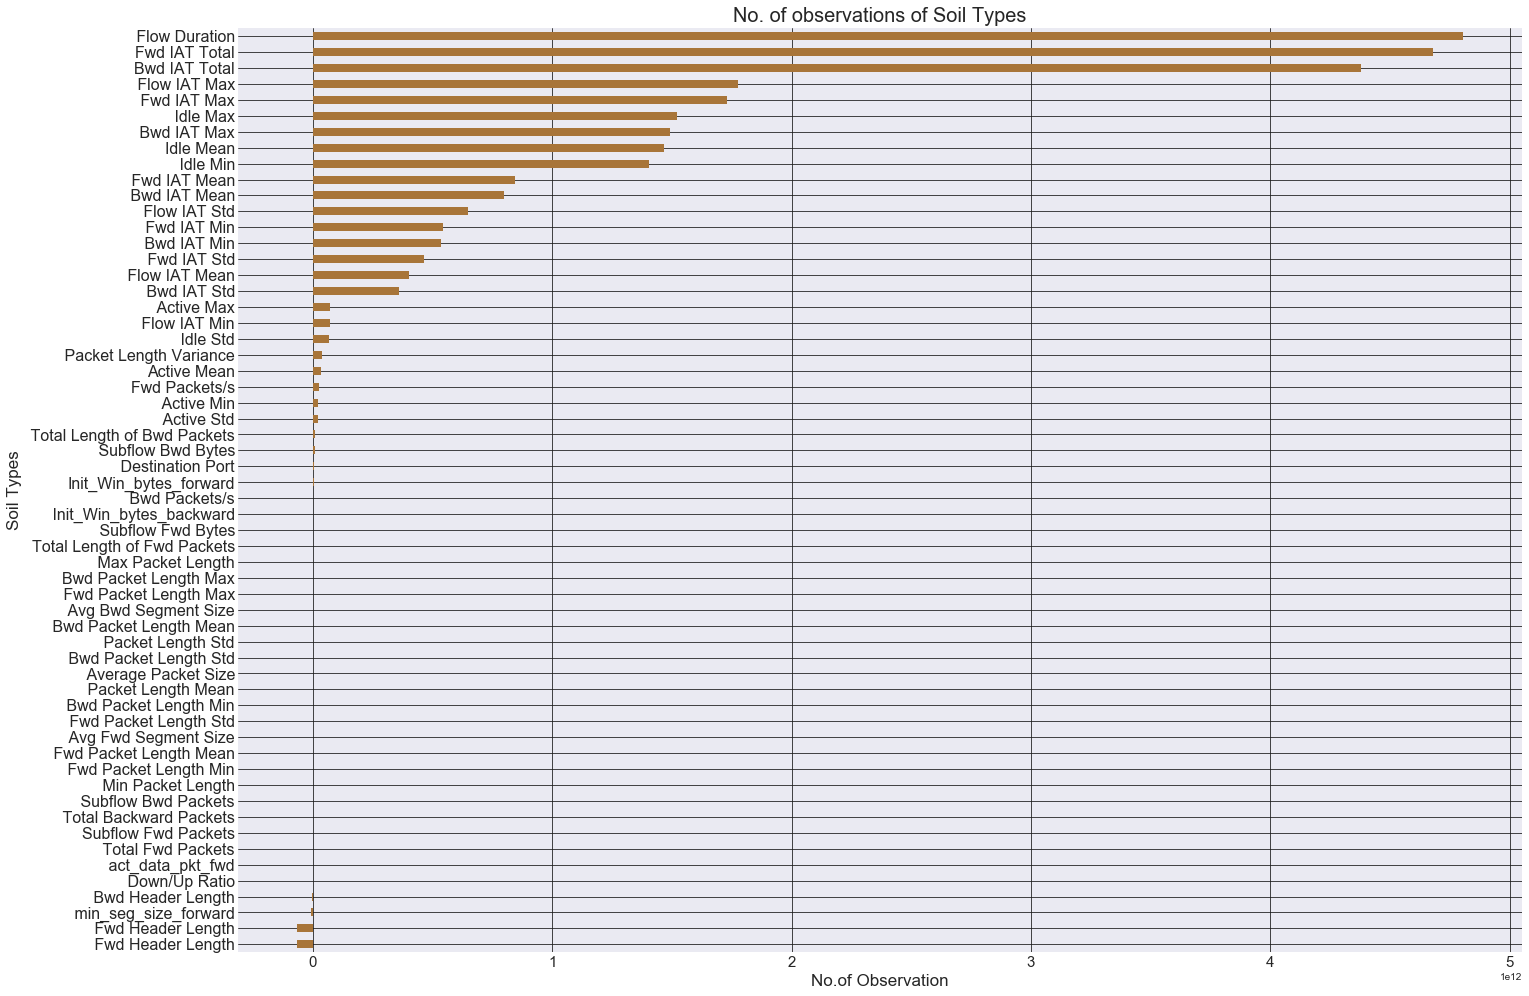

In [34]:
####    3.3    #####
# Horizontal Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(num_fea.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Numeric Feature Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)

# Vertical axis Label
plt.ylabel('Feature Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

# Feature Comparison

Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use Violin Plot to visualize this, a combination of Box Plot and Density Plot (Histogram).

In [39]:
binary_fea.dropna()
binary_fea.shape

(445909, 8)

TypeError: cannot label index with a null key

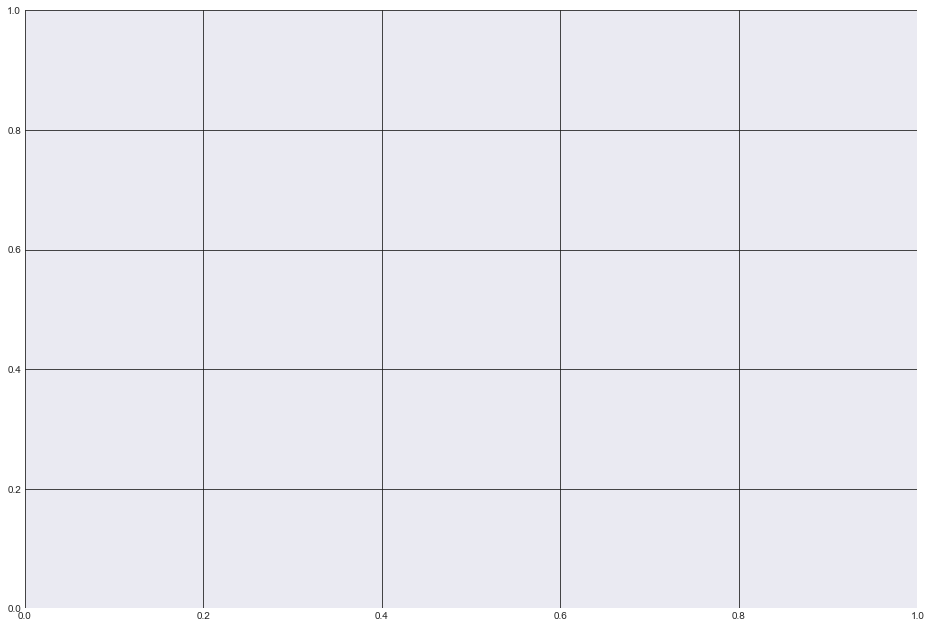

In [35]:
#######    4.1    ########
# Violin Plot (Box + Density)
# Comparing categorical features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data[' Label']

# features to be compared with target variable
features = binary_fea.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(16, 11))
    
    # Plot violin for i feature for every class in target 
    sns.violinplot(data=num_fea, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
    
    # display plot
    plt.show()

# Feature Correlation

Now Let us see how much each features are correlated with each other...

Since part of our data is binary, we will exclude binary data from our dataset and only find correlation matrix of numerical data becuase correlation requires continous data.

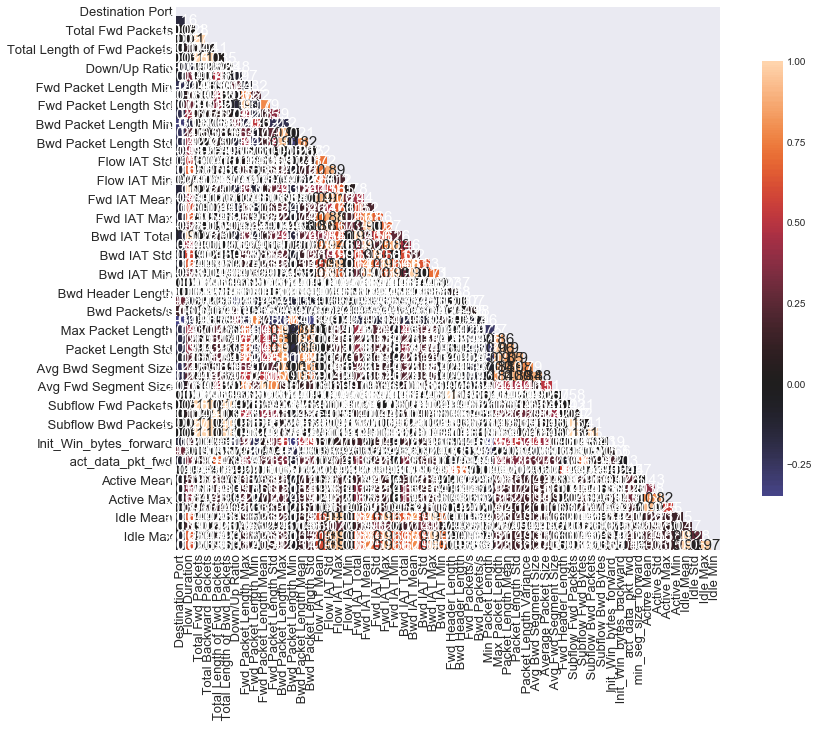

In [36]:
######    5    #######
# Correlation Plot
# Correlation of each feature

# fig size
plt.subplots(figsize=(15, 10))

# Compute the correlation matrix
num_fea_corr = num_fea.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(num_fea_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generates heatmap masking the upper triangle and shrinking the cbar
sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

# x-axis label size
plt.xticks(size = 13)
# y-axis label size
plt.yticks(size = 13)

# display plot
plt.show()

Features that have less or no correlation are colored black while features with positive correlation are colored orange and blue for negative correlation.

As we can see from the above figure, correlation values of the features are given in their respective boxes.

Less Correlated value tell us that the features have different valueable information to tell us and model, hence important features for predictions.

In [42]:
data.shape

(445909, 79)

In [41]:
data.dropna()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,88,986,9,6,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,935,9,6,3074,3010,1537,0,341.555556,677.753294,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,389,572849,15,12,4076,1020,1646,0,271.733333,562.935859,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49193,1,2,1,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,88,1075,9,9,3100,3030,1550,0,344.444444,683.485755,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [43]:
# deleting duplicates, except the first observation
data.drop_duplicates(keep='first')

# shape of the data after deleting duplicate entries
data.shape

(445909, 79)

# Extra-Tree Classifier

In [55]:
# importing model for feature importance
from sklearn.ensemble import ExtraTreesClassifier

# passing the model
model = ExtraTreesClassifier(random_state = 53)

# feeding all our features to var 'X'
X = data.iloc[:,:-1]
# feeding our target variable to var 'y'
y = data[' Label']

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
ETC_feature_importances.head(24)

,ETC
Destination Port,0.134171
Init_Win_bytes_forward,0.050135
Down/Up Ratio,0.047228
Bwd IAT Max,0.044738
min_seg_size_forward,0.041129
Average Packet Size,0.033615
Fwd Packets/s,0.029872
SYN Flag Count,0.029057
Fwd IAT Std,0.028995
Bwd Packet Length Std,0.028806


In [48]:
data = data.drop(['Flow Bytes/s',' Flow Packets/s'], axis=1)

# Random Forest Classifier

In [54]:
# importing model for feature importance
from sklearn.ensemble import RandomForestClassifier

# passing the model
model = RandomForestClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
RFC_feature_importances.head(24)

,RFC
Destination Port,0.330573
Total Length of Fwd Packets,0.058974
Average Packet Size,0.053664
Bwd Packet Length Std,0.042633
Init_Win_bytes_backward,0.039024
Fwd Packet Length Std,0.037809
Total Length of Bwd Packets,0.034345
Init_Win_bytes_forward,0.030352
Total Backward Packets,0.026501
Fwd Header Length,0.025781


# Adaboost Classifier

In [51]:
# importing model for feature importance
from sklearn.ensemble import AdaBoostClassifier

# passing the model
model = AdaBoostClassifier(random_state = 53)

model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

# removing traces of this model
model = None

ADB_feature_importances.head(10)

,ADB
Destination Port,0.5
Init_Win_bytes_backward,0.5
ECE Flag Count,0.0
Fwd Avg Bytes/Bulk,0.0
Fwd Header Length.1,0.0
Avg Bwd Segment Size,0.0
Avg Fwd Segment Size,0.0
Average Packet Size,0.0
Down/Up Ratio,0.0
CWE Flag Count,0.0


# Gradient Boosting Classifier

In [53]:
# importing model for feature importance
from sklearn.ensemble import GradientBoostingClassifier

# passing the model
model = GradientBoostingClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
GBC_feature_importances.head(24)

,GBC
Destination Port,0.313733
Init_Win_bytes_backward,0.143695
Flow IAT Min,0.081800
Fwd IAT Min,0.055133
Bwd IAT Min,0.039846
Fwd IAT Std,0.027007
Total Backward Packets,0.026707
Packet Length Mean,0.026397
Fwd Header Length,0.017490
Init_Win_bytes_forward,0.015776


In [61]:
## feeding top 15 features in a variable as dataframe including target variable

## AdaBoost Sample
#sample = data[['Wilderness_Area4', 'Elevation','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4', 'Soil_Type4', 'Soil_Type10' 'Cover_Type']]

sample = data[[' Destination Port', 'Init_Win_bytes_forward', ' min_seg_size_forward', ' Average Packet Size', ' Fwd IAT Std', 
               ' Bwd Packet Length Std', ' Packet Length Std', ' Flow IAT Mean', ' Fwd Packet Length Max', ' Init_Win_bytes_backward', 
               ' Total Backward Packets', ' Packet Length Mean', ' Fwd Header Length', ' Fwd IAT Mean', ' Bwd Header Length', ' Label']]

# Feature Scaling

One last step before we move to splitting our data to Train-Test Split is to scale the features to some specific range. This is called Feature Scaling. We will scale all feature values to specific range of 0 to 1. but before we do this we will split the feature and target variables because we dont want to scale our target variable

In [62]:
sample.shape

(445909, 16)

In [63]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# feeding sample features to var 'X'
X = sample.iloc[:,:-1]

# feeding our target variable to var 'y'
y = sample[' Label']

# apply feature scaling to all features
X_scaled = scaler.fit_transform(X)
#s_sample_2 = scaler.fit_transform(X2)

In [69]:
y.shape

(445909,)

In [71]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [72]:
# number of training observation
print(X_train.shape, X_test.shape)

(334431, 15) (111478, 15)


# Model Evaluation

In [75]:
### defining function for training models and measuring performance 

# to measure performance
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to three decimal places
    # time in training
    t_time = np.round((t_end - t_start) / 60, 3)
    # time for evaluating scores
    c_time = np.round((c_end - c_start) / 60, 3)
    
    
    # Removing traces of classifier
    clf = None
    
    
    # returns performance measure and time of the classifier 
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")


Benchmark Model
Now lets see the performance of MultinomialNB classifier on given training data.

In [76]:
# importing Multinomial classifier, one of the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# passing the model to function to get performance measures
model_evaluation(MultinomialNB())

The accuracy score of this classifier on our training set is 96.87 % and f1 score is 32.8 % taking 0.03 minutes to train and 0.632 minutes to evaluate cross validation and metric scores.


It performed quite well, atleast what I had expected in terms of accuracy but it performs poorly in precision and recall and that's what f1 score evaluates for us.

Let's now move on to measure performance on the models that I have chose for this problem, they are:

1. K-Nearest Neighbour (KNN) 
2. Random Forest (RF)
3. Stochastic Gradient Descent Classifier (SGDC)
4. Extraa Trees Classifier (ETC)
5. Logistic Regression (LR)

1. K-Nearest Neighbors

In [77]:
# importing K-Nearest Neighbors Classifier function
from sklearn.neighbors import KNeighborsClassifier

model_evaluation(KNeighborsClassifier(n_jobs=-1))

The accuracy score of this classifier on our training set is 100.0 % and f1 score is 99.95 % taking 4.114 minutes to train and 55.615 minutes to evaluate cross validation and metric scores.


2. Random Forest Classifier

In [78]:
# importing Random Forest function
from sklearn.ensemble import RandomForestClassifier

model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 100.0 % and f1 score is 99.99 % taking 0.035 minutes to train and 0.765 minutes to evaluate cross validation and metric scores.


3. Stochastic Gradient Descent Classifier

In [79]:
# importing Stochastic Gradient Descent Classifier function
from sklearn.linear_model import SGDClassifier

model_evaluation(SGDClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 96.87 % and f1 score is 32.8 % taking 0.02 minutes to train and 0.355 minutes to evaluate cross validation and metric scores.


# Testing Model

In [ ]:
# importing EM scores for model performance measure
from sklearn.metrics import accuracy_score, f1_score

# definning best chosen classifier
clf = RandomForestClassifier(n_estimators = 50, random_state = 53)

# training our model
clf = clf.fit(X_train, y_train)

# predicting unseen data
predict = clf.predict(X_test)

# calculating accuracy
accuracy = accuracy_score(y_test, predict)

# calculating f1 score
f1_score = f1_score(y_test, predict, average = 'macro')

# taking precentage and rounding to 3 places
accuracy = np.round(accuracy * 100, 3)
f1_score = np.round(f1_score * 100, 3)

# cleaning traces
clf = None

# results
print("The accuracy score of our final model Random Forest Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")